In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/NYPD_Shooting_Incident_Data__Historic__20241029.csv')

In [ ]:
df

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
0,244608249,5/5/2022,0:10:00,MANHATTAN,INSIDE,14,0.0,COMMERCIAL,VIDEO STORE,True,...,M,BLACK,25-44,M,BLACK,986050.000,214231.000000,40.754692,-73.993500,POINT (-73.9935 40.754692)
1,247542571,7/4/2022,22:20:00,BRONX,OUTSIDE,48,0.0,STREET,(null),True,...,(null),(null),18-24,M,BLACK,1016802.000,250581.000000,40.854402,-73.882330,POINT (-73.88233 40.854402)
2,84967535,5/27/2012,19:35:00,QUEENS,NaN,103,0.0,NaN,NaN,False,...,NaN,NaN,18-24,M,BLACK,1048632.000,198262.000000,40.710634,-73.767773,POINT (-73.76777349199995 40.71063412500007)
3,202853370,9/24/2019,21:00:00,BRONX,NaN,42,0.0,NaN,NaN,False,...,M,UNKNOWN,25-44,M,BLACK,1014493.000,242565.000000,40.832417,-73.890714,POINT (-73.89071440599997 40.832416753000075)
4,27078636,2/25/2007,21:00:00,BROOKLYN,NaN,83,0.0,NaN,NaN,False,...,M,BLACK,25-44,M,BLACK,1009149.375,190104.703125,40.688443,-73.910219,POINT (-73.91021857399994 40.68844345900004)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28557,265354835,3/19/2023,23:48:00,BRONX,INSIDE,47,0.0,COMMERCIAL,GROCERY/BODEGA,True,...,M,BLACK,18-24,M,BLACK,1025687.000,268586.000000,40.903785,-73.850098,POINT (-73.850098 40.903785)
28558,272968931,8/16/2023,2:46:00,BRONX,OUTSIDE,41,0.0,STREET,(null),False,...,F,BLACK,45-64,M,BLACK,1014639.000,240066.000000,40.825549,-73.890195,POINT (-73.890195 40.825549)
28559,270489846,6/27/2023,12:27:00,BRONX,INSIDE,41,0.0,DWELLING,MULTI DWELL - APT BUILD,True,...,M,BLACK,25-44,M,BLACK,1012221.000,238552.000000,40.821404,-73.898938,POINT (-73.898938 40.821404)
28560,271021661,7/8/2023,11:27:00,QUEENS,OUTSIDE,102,0.0,STREET,BEAUTY/NAIL SALON,False,...,M,WHITE HISPANIC,65+,M,ASIAN / PACIFIC ISLANDER,1028856.000,192785.000000,40.695717,-73.839138,POINT (-73.839138 40.695717)


In [ ]:
df.isnull().sum()

,0
INCIDENT_KEY,0
OCCUR_DATE,0
OCCUR_TIME,0
BORO,0
LOC_OF_OCCUR_DESC,25596
PRECINCT,0
JURISDICTION_CODE,2
LOC_CLASSFCTN_DESC,25596
LOCATION_DESC,14977
STATISTICAL_MURDER_FLAG,0


LOC_OF_OCCUR_DESC has a lot of missing values. Since this column is not necessary for a deep dive analysis it is better to drop the whole column rather than drop the rows because they are missing values in this column. Same for LOC_CLASSFCTN_DESC.
We will also drop different variations of coordinates data Y_COORD_CD, X_COORD_CD, Lon_Lat as these columns are not necessary


In [ ]:
# Dropping the specified columns
df_d1 = df.drop(columns=['LOC_OF_OCCUR_DESC', 'LOC_CLASSFCTN_DESC', 'LOCATION_DESC', 'Y_COORD_CD', 'X_COORD_CD', 'Lon_Lat'])


In [ ]:
df_d1

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,244608249,5/5/2022,0:10:00,MANHATTAN,14,0.0,True,25-44,M,BLACK,25-44,M,BLACK,40.754692,-73.993500
1,247542571,7/4/2022,22:20:00,BRONX,48,0.0,True,(null),(null),(null),18-24,M,BLACK,40.854402,-73.882330
2,84967535,5/27/2012,19:35:00,QUEENS,103,0.0,False,NaN,NaN,NaN,18-24,M,BLACK,40.710634,-73.767773
3,202853370,9/24/2019,21:00:00,BRONX,42,0.0,False,25-44,M,UNKNOWN,25-44,M,BLACK,40.832417,-73.890714
4,27078636,2/25/2007,21:00:00,BROOKLYN,83,0.0,False,25-44,M,BLACK,25-44,M,BLACK,40.688443,-73.910219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28557,265354835,3/19/2023,23:48:00,BRONX,47,0.0,True,18-24,M,BLACK,18-24,M,BLACK,40.903785,-73.850098
28558,272968931,8/16/2023,2:46:00,BRONX,41,0.0,False,25-44,F,BLACK,45-64,M,BLACK,40.825549,-73.890195
28559,270489846,6/27/2023,12:27:00,BRONX,41,0.0,True,25-44,M,BLACK,25-44,M,BLACK,40.821404,-73.898938
28560,271021661,7/8/2023,11:27:00,QUEENS,102,0.0,False,25-44,M,WHITE HISPANIC,65+,M,ASIAN / PACIFIC ISLANDER,40.695717,-73.839138


In [ ]:
df_d1.isnull().sum()

,0
INCIDENT_KEY,0
OCCUR_DATE,0
OCCUR_TIME,0
BORO,0
PRECINCT,0
JURISDICTION_CODE,2
STATISTICAL_MURDER_FLAG,0
PERP_AGE_GROUP,9344
PERP_SEX,9310
PERP_RACE,9310


For the columns of PERP_AGE_GROUP, PERP_SEX and PERP_RACE  we will fill those missing values with "UNKNOWN". Why? because dropping 9310 rows out of 28562 would mean dropping 32.6% of our data and replacing those values with mode or average could skewed the data.

After doing this second data cleanup, the dataset should have 14 columns with a maximum of 61 rows with missing values which we will drop because this is only 0.21% of the data which will have no impact in our analysis.




In [ ]:
df_d2 = df_d1
df_d2['PERP_AGE_GROUP'].fillna('UNKNOWN', inplace=True)
df_d2['PERP_SEX'].fillna('UNKNOWN', inplace=True)
df_d2['PERP_RACE'].fillna('UNKNOWN', inplace=True)



<ipython-input-8-5f0d7cb708a1>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_d2['PERP_AGE_GROUP'].fillna('UNKNOWN', inplace=True)
<ipython-input-8-5f0d7cb708a1>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [ ]:
df_d2

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,244608249,5/5/2022,0:10:00,MANHATTAN,14,0.0,True,25-44,M,BLACK,25-44,M,BLACK,40.754692,-73.993500
1,247542571,7/4/2022,22:20:00,BRONX,48,0.0,True,(null),(null),(null),18-24,M,BLACK,40.854402,-73.882330
2,84967535,5/27/2012,19:35:00,QUEENS,103,0.0,False,UNKNOWN,UNKNOWN,UNKNOWN,18-24,M,BLACK,40.710634,-73.767773
3,202853370,9/24/2019,21:00:00,BRONX,42,0.0,False,25-44,M,UNKNOWN,25-44,M,BLACK,40.832417,-73.890714
4,27078636,2/25/2007,21:00:00,BROOKLYN,83,0.0,False,25-44,M,BLACK,25-44,M,BLACK,40.688443,-73.910219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28557,265354835,3/19/2023,23:48:00,BRONX,47,0.0,True,18-24,M,BLACK,18-24,M,BLACK,40.903785,-73.850098
28558,272968931,8/16/2023,2:46:00,BRONX,41,0.0,False,25-44,F,BLACK,45-64,M,BLACK,40.825549,-73.890195
28559,270489846,6/27/2023,12:27:00,BRONX,41,0.0,True,25-44,M,BLACK,25-44,M,BLACK,40.821404,-73.898938
28560,271021661,7/8/2023,11:27:00,QUEENS,102,0.0,False,25-44,M,WHITE HISPANIC,65+,M,ASIAN / PACIFIC ISLANDER,40.695717,-73.839138


In [ ]:
df_d2['PERP_AGE_GROUP'].replace('(null)', 'UNKNOWN', inplace=True)
df_d2['PERP_SEX'].replace('(null)', 'UNKNOWN', inplace=True)
df_d2['PERP_RACE'].replace('(null)', 'UNKNOWN', inplace=True)

<ipython-input-10-47c69b51b2ea>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_d2['PERP_AGE_GROUP'].replace('(null)', 'UNKNOWN', inplace=True)
<ipython-input-10-47c69b51b2ea>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [ ]:
df_d2

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,244608249,5/5/2022,0:10:00,MANHATTAN,14,0.0,True,25-44,M,BLACK,25-44,M,BLACK,40.754692,-73.993500
1,247542571,7/4/2022,22:20:00,BRONX,48,0.0,True,UNKNOWN,UNKNOWN,UNKNOWN,18-24,M,BLACK,40.854402,-73.882330
2,84967535,5/27/2012,19:35:00,QUEENS,103,0.0,False,UNKNOWN,UNKNOWN,UNKNOWN,18-24,M,BLACK,40.710634,-73.767773
3,202853370,9/24/2019,21:00:00,BRONX,42,0.0,False,25-44,M,UNKNOWN,25-44,M,BLACK,40.832417,-73.890714
4,27078636,2/25/2007,21:00:00,BROOKLYN,83,0.0,False,25-44,M,BLACK,25-44,M,BLACK,40.688443,-73.910219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28557,265354835,3/19/2023,23:48:00,BRONX,47,0.0,True,18-24,M,BLACK,18-24,M,BLACK,40.903785,-73.850098
28558,272968931,8/16/2023,2:46:00,BRONX,41,0.0,False,25-44,F,BLACK,45-64,M,BLACK,40.825549,-73.890195
28559,270489846,6/27/2023,12:27:00,BRONX,41,0.0,True,25-44,M,BLACK,25-44,M,BLACK,40.821404,-73.898938
28560,271021661,7/8/2023,11:27:00,QUEENS,102,0.0,False,25-44,M,WHITE HISPANIC,65+,M,ASIAN / PACIFIC ISLANDER,40.695717,-73.839138


In [ ]:
df_d2['OCCUR_DATE'] = pd.to_datetime(df_d2['OCCUR_DATE'], errors='coerce')
count_before_2016 = df_d2[df_d2['OCCUR_DATE'] < '2006-01-01'].shape[0]
print(count_before_2016)

0


We know that the dataset should only go back to January 1 2006. Therefore this dataset should not have any incident prior to that date. With this code we verify this and since there are no incidents that occured prior to 1/1/2006 we don't need to drop rows because of this.

In [ ]:
df_d2.isnull().sum()

,0
INCIDENT_KEY,0
OCCUR_DATE,0
OCCUR_TIME,0
BORO,0
PRECINCT,0
JURISDICTION_CODE,2
STATISTICAL_MURDER_FLAG,0
PERP_AGE_GROUP,0
PERP_SEX,0
PERP_RACE,0


In [ ]:
df_d2.dropna(inplace=True)

In [ ]:
df_d2.isna().sum()

,0
INCIDENT_KEY,0
OCCUR_DATE,0
OCCUR_TIME,0
BORO,0
PRECINCT,0
JURISDICTION_CODE,0
STATISTICAL_MURDER_FLAG,0
PERP_AGE_GROUP,0
PERP_SEX,0
PERP_RACE,0


In [ ]:
df_cleaned = df_d2

In [ ]:
df_cleaned

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,Latitude,Longitude
0,244608249,2022-05-05,0:10:00,MANHATTAN,14,0.0,True,25-44,M,BLACK,25-44,M,BLACK,40.754692,-73.993500
1,247542571,2022-07-04,22:20:00,BRONX,48,0.0,True,UNKNOWN,UNKNOWN,UNKNOWN,18-24,M,BLACK,40.854402,-73.882330
2,84967535,2012-05-27,19:35:00,QUEENS,103,0.0,False,UNKNOWN,UNKNOWN,UNKNOWN,18-24,M,BLACK,40.710634,-73.767773
3,202853370,2019-09-24,21:00:00,BRONX,42,0.0,False,25-44,M,UNKNOWN,25-44,M,BLACK,40.832417,-73.890714
4,27078636,2007-02-25,21:00:00,BROOKLYN,83,0.0,False,25-44,M,BLACK,25-44,M,BLACK,40.688443,-73.910219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28557,265354835,2023-03-19,23:48:00,BRONX,47,0.0,True,18-24,M,BLACK,18-24,M,BLACK,40.903785,-73.850098
28558,272968931,2023-08-16,2:46:00,BRONX,41,0.0,False,25-44,F,BLACK,45-64,M,BLACK,40.825549,-73.890195
28559,270489846,2023-06-27,12:27:00,BRONX,41,0.0,True,25-44,M,BLACK,25-44,M,BLACK,40.821404,-73.898938
28560,271021661,2023-07-08,11:27:00,QUEENS,102,0.0,False,25-44,M,WHITE HISPANIC,65+,M,ASIAN / PACIFIC ISLANDER,40.695717,-73.839138


In [ ]:
df_cleaned.isnull().sum()

,0
INCIDENT_KEY,0
OCCUR_DATE,0
OCCUR_TIME,0
BORO,0
PRECINCT,0
JURISDICTION_CODE,0
STATISTICAL_MURDER_FLAG,0
PERP_AGE_GROUP,0
PERP_SEX,0
PERP_RACE,0


We now have our preprocessed dataset that we have called df_cleaned 18 columns/features and 28501 out of the 28562 original rows 99.786% of the original rows in the data set.

In [ ]:
from google.colab import files
df_cleaned.to_csv('df_cleaned.csv', index=False)
files.download('df_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

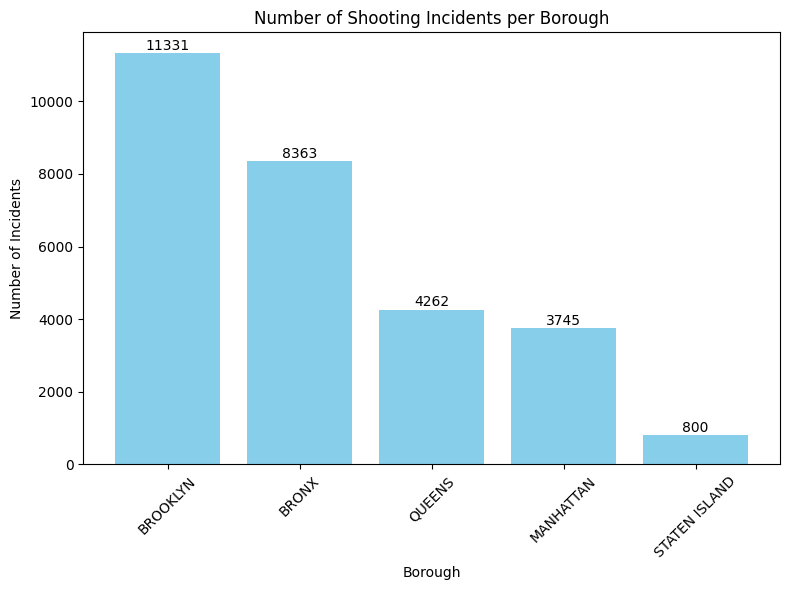

In [ ]:
import matplotlib.pyplot as plt

# Count the number of incidents per borough
boro_counts = df_cleaned['BORO'].value_counts()


plt.figure(figsize=(8, 6))
plt.bar(boro_counts.index, boro_counts.values, color='skyblue')


for i, value in enumerate(boro_counts.values):
    plt.text(i, value + 5, str(value), ha='center', va='bottom')


plt.title('Number of Shooting Incidents per Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


As we can see from the data, the borough with the highest shooting incidents is Brooklyn, followed by the Bronx. These two boroughs account for 19,694 shooting incidents (69.09% of the shootings reported in the dataset)

The other three boroughs account for the remainder 8,807 shooting incidents.

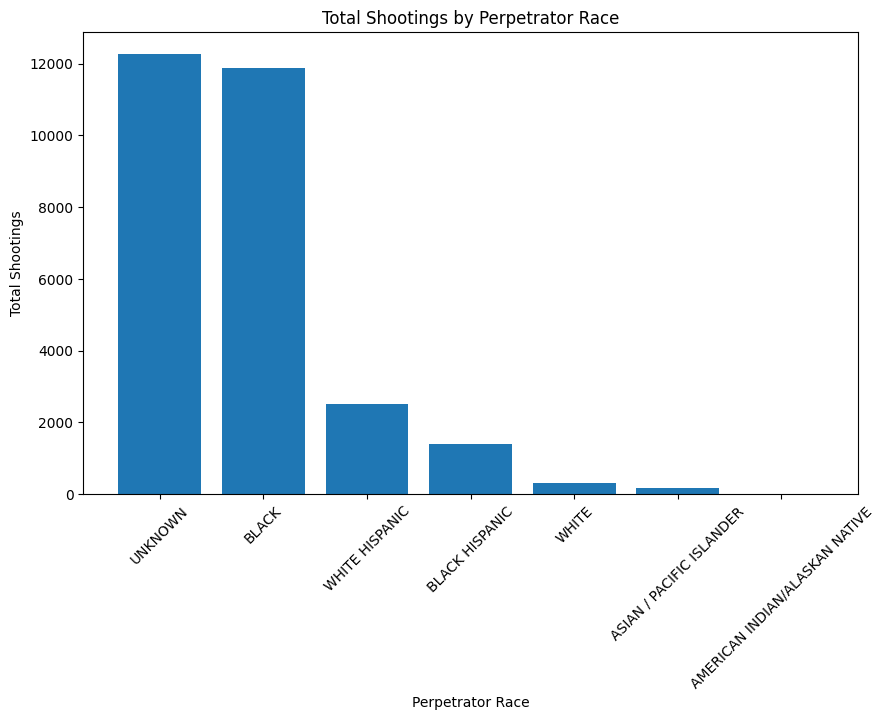

In [ ]:

# Calculate total shootings per victim race
total_shootings_by_race = df_cleaned['PERP_RACE'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(total_shootings_by_race.index, total_shootings_by_race.values)
plt.xlabel('Perpetrator Race')
plt.ylabel('Total Shootings')
plt.title('Total Shootings by Perpetrator Race')
plt.xticks(rotation=45)
plt.show()

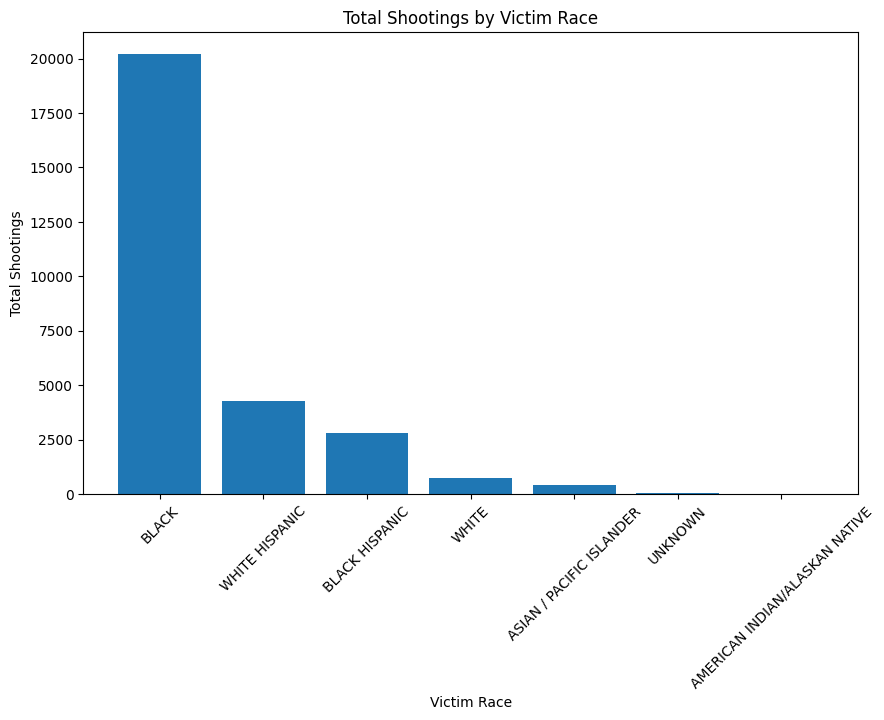

In [ ]:

# Calculate total shootings per victim race
total_shootings_by_race = df_cleaned['VIC_RACE'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(total_shootings_by_race.index, total_shootings_by_race.values)
plt.xlabel('Victim Race')
plt.ylabel('Total Shootings')
plt.title('Total Shootings by Victim Race')
plt.xticks(rotation=45)
plt.show()

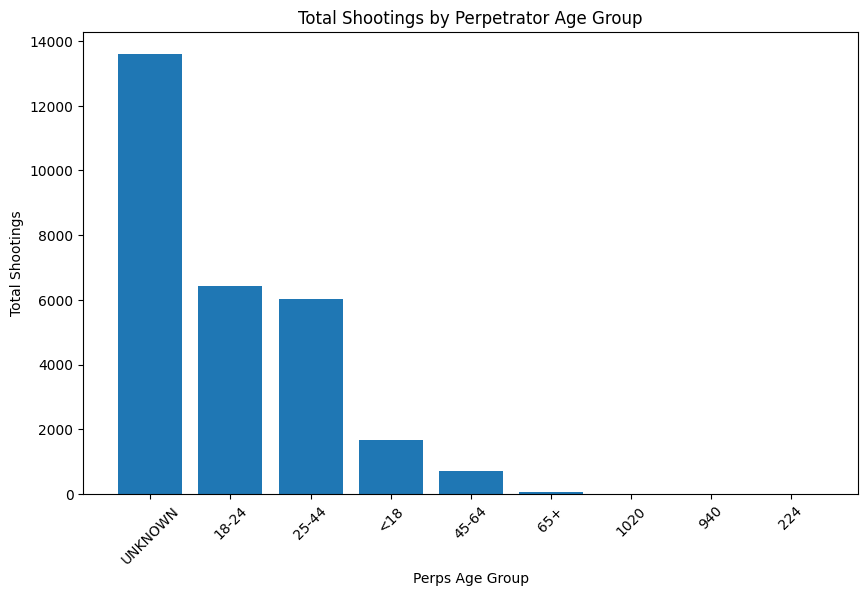

In [ ]:
# Calculate total shootings per victim race
total_shootings_by_race = df_cleaned['PERP_AGE_GROUP'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(total_shootings_by_race.index, total_shootings_by_race.values)
plt.xlabel('Perps Age Group')
plt.ylabel('Total Shootings')
plt.title('Total Shootings by Perpetrator Age Group')
plt.xticks(rotation=45)
plt.show()

In [ ]:
murder_count_by_borough = (
    df_cleaned[df_cleaned['STATISTICAL_MURDER_FLAG']]
    .groupby('BORO')['INCIDENT_KEY']
    .nunique()
    .reset_index(name='Murder_Count')
)

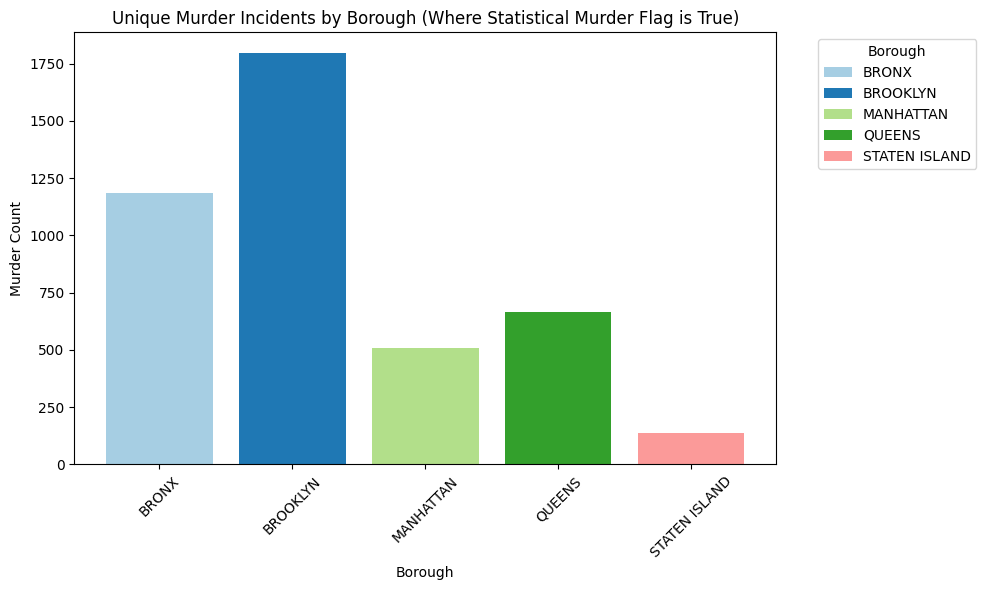

In [ ]:

colors = plt.cm.Paired(range(len(murder_count_by_borough)))

plt.figure(figsize=(10, 6))
bars = plt.bar(murder_count_by_borough['BORO'], murder_count_by_borough['Murder_Count'], color=colors)


plt.legend(bars, murder_count_by_borough['BORO'], title="Borough", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Borough')
plt.ylabel('Murder Count')
plt.title('Unique Murder Incidents by Borough (Where Statistical Murder Flag is True)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()